In [1]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 20.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
data=files.upload()

Saving TEAM7.csv to TEAM7.csv


In [5]:
df = pd.read_csv('TEAM7.csv',sep=';',on_bad_lines='skip')

In [6]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [7]:
df.shape

(6488, 47)

In [20]:
selected_columns=['Smiles','Standard Type']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()

,Smiles,Standard Type
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50


In [21]:
cleaned_df = df.dropna()

In [22]:
cleaned_df.shape

(0, 47)

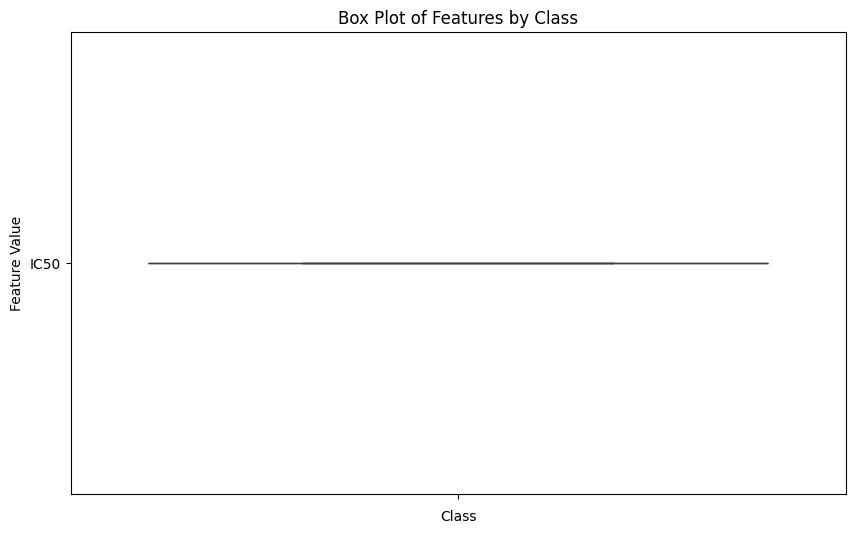

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Standard Type', data=filter_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

In [37]:
filter_df['Standard Type'].max()

'IC50'

In [38]:
filter_df['Standard Type'].min()

'IC50'